<a href="https://colab.research.google.com/github/nan-park/section2_project/blob/main/us_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

In [25]:
from google.colab import files
files.upload();

Saving us_economic_data.csv to us_economic_data.csv
Saving us_economic_data_clean.csv to us_economic_data_clean (1).csv


In [5]:
url = 'us_economic_data_clean.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,funds_rate,oil_price,CPI,GS3,unemployment_rate,GDP,economic_growth_rate
1986-01-01,8.144839,22.925455,3.886256,8.41,6.7,4486.627333,0.476259
1986-02-01,7.860000,15.433625,3.113208,8.10,7.2,4507.894000,0.474001
1986-03-01,7.479032,12.539286,2.255639,7.30,7.2,4520.376000,0.276892
1986-04-01,6.988000,12.843636,1.590271,6.86,7.1,4532.858000,0.276127
1986-05-01,6.852903,15.386023,1.491146,7.27,7.2,4545.340000,0.275367


In [26]:
# 이후 참고용
url = 'us_economic_data.csv'
whole_data = pd.read_csv(url, index_col=0)

In [ ]:
df.drop('GDP', axis=1, inplace=True)  # 혼자 단위의 차이가 너무 많이 나므로/경제성장률이 있으므로 제거한다

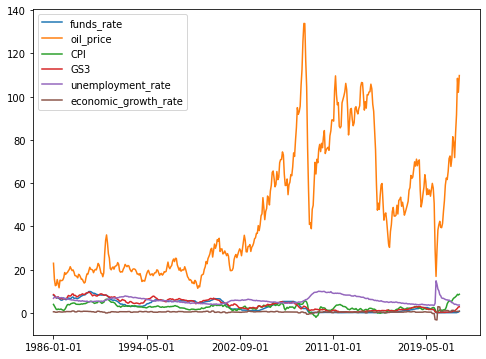

In [17]:
df.plot(figsize=(8,6));

이때, 시계열이 정상성을 띠고 있는지 확인한다<br>
ADF 검정을 통해 p-value가 0.05 이하이면 정상성을 띤다고 할 수 있다.

In [24]:
# from statsmodels.tsa.stattools import adfuller

def adf_test(y):
  dftest = adfuller(y, autolag='AIC')
  pvalue = dftest[1]
  return pvalue

for col in df.columns:
  print(f"{col}: {adf_test(df[col]).round(4)}")

funds_rate: 0.071
oil_price: 0.2932
CPI: 0.2866
GS3: 0.4736
unemployment_rate: 0.0102
economic_growth_rate: 0.0004


실업률, 경제성장률만 정상성을 띤다.<br>
나머지는 차분, 로그변환 등을 통해 정상성을 가지도록 한다

Index(['funds_rate', 'oil_price', 'CPI', 'GS3', 'unemployment_rate',
       'economic_growth_rate'],
      dtype='object')